In [272]:
# !pip install xgboost

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score

In [274]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [275]:
df = pd.read_csv('bank_churners.csv')

In [282]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [283]:
df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1,
       inplace=True)

In [284]:
df.shape

(10127, 20)

In [285]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [286]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [287]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Attrited Customer':1,'Existing Customer':0})

## Explore Continuous Features

In [288]:
cont_feat = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
             'Avg_Utilization_Ratio']

In [289]:
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(df.groupby('Attrition_Flag')[feature].describe())

In [290]:
for feat in cont_feat:
    describe_cont_feature(feat)


*** Results for Customer_Age ***
                 count       mean       std   min   25%   50%   75%   max
Attrition_Flag                                                           
0               8500.0  46.262118  8.081157  26.0  41.0  46.0  52.0  73.0
1               1627.0  46.659496  7.665652  26.0  41.0  47.0  52.0  68.0

*** Results for Dependent_count ***
                 count      mean       std  min  25%  50%  75%  max
Attrition_Flag                                                     
0               8500.0  2.335412  1.303229  0.0  1.0  2.0  3.0  5.0
1               1627.0  2.402581  1.275010  0.0  2.0  2.0  3.0  5.0

*** Results for Months_on_book ***
                 count       mean       std   min   25%   50%   75%   max
Attrition_Flag                                                           
0               8500.0  35.880588  8.021810  13.0  31.0  36.0  40.0  56.0
1               1627.0  36.178242  7.796548  13.0  32.0  36.0  40.0  56.0

*** Results for Total_Relati

In [291]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


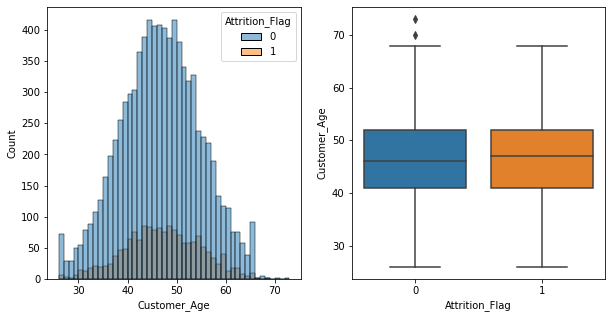

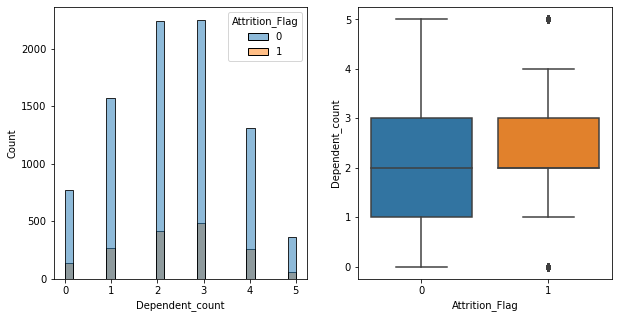

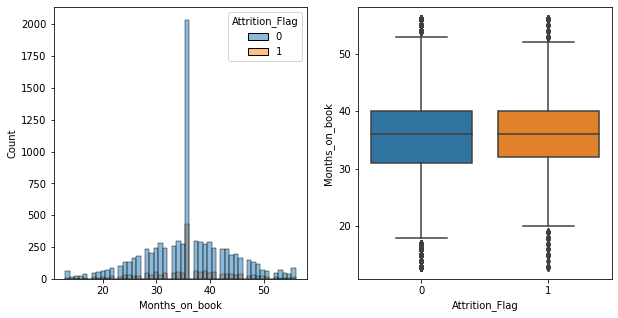

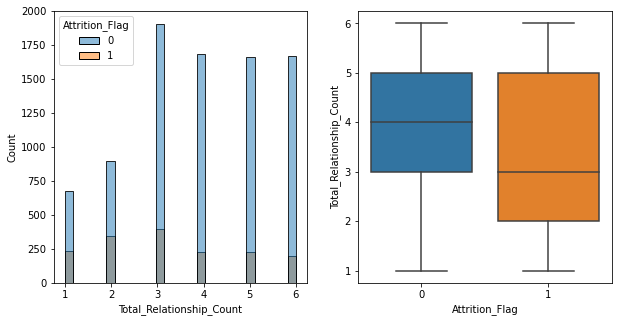

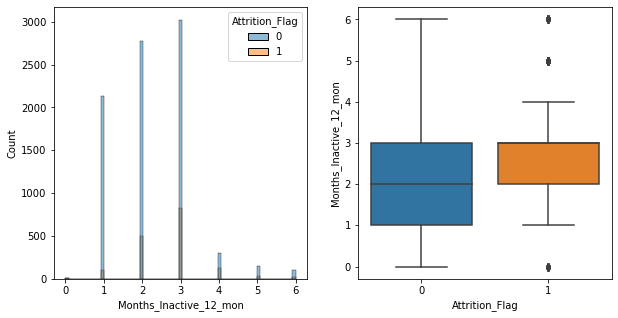

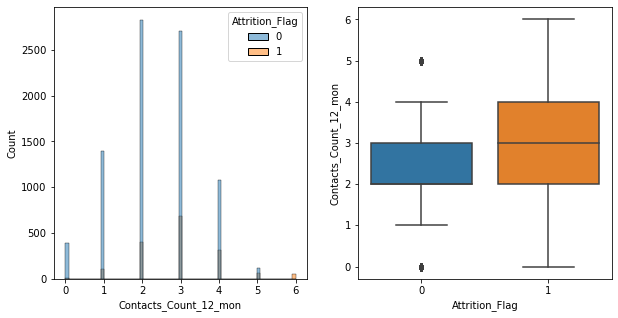

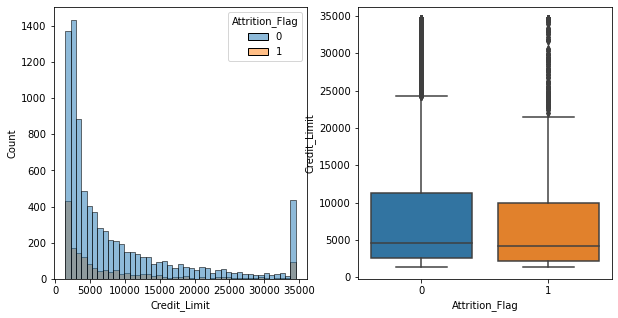

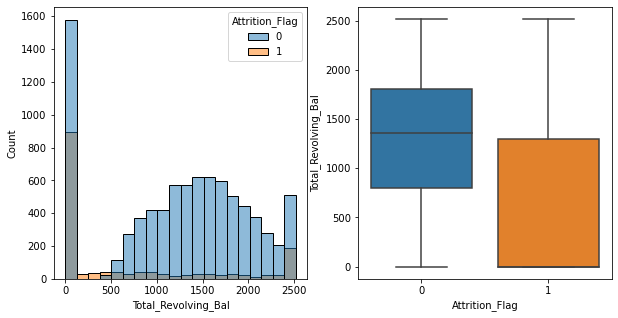

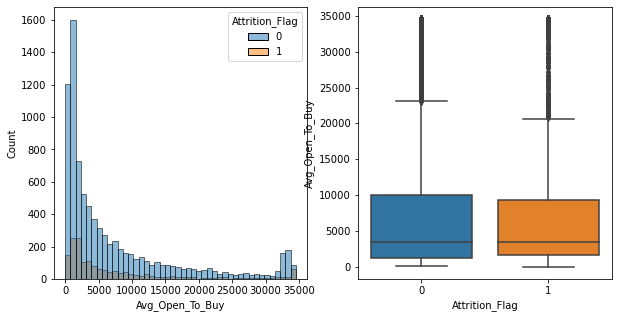

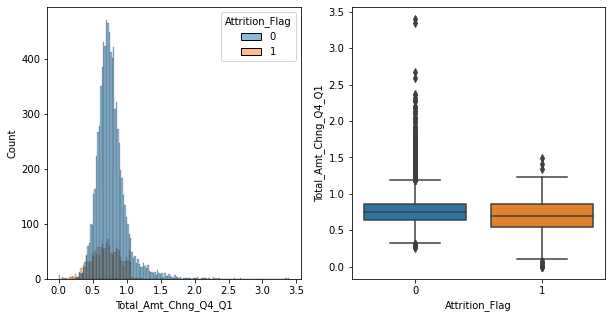

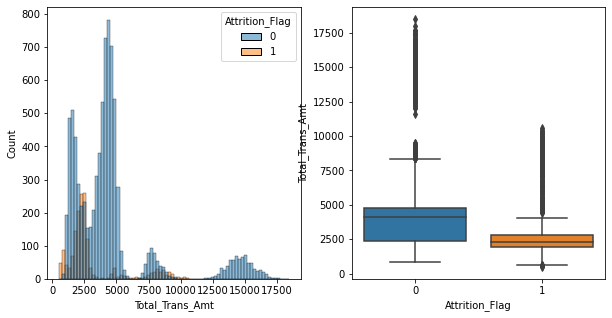

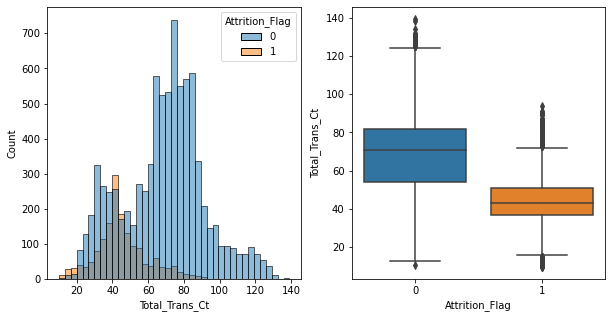

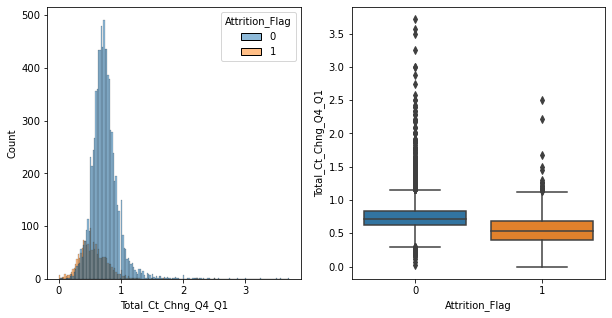

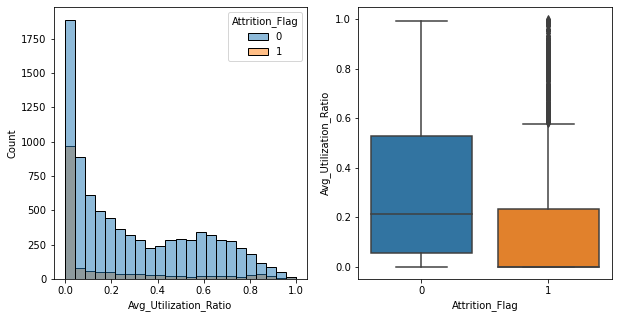

In [292]:
for col in cont_feat:
    f, ax = plt.subplots(1, 2, figsize = (10, 5))
    sns.histplot(data = df, hue = 'Attrition_Flag', x = col, ax=ax[0])
    sns.boxplot(x='Attrition_Flag',y=col, data=df, ax=ax[1])
    plt.show()

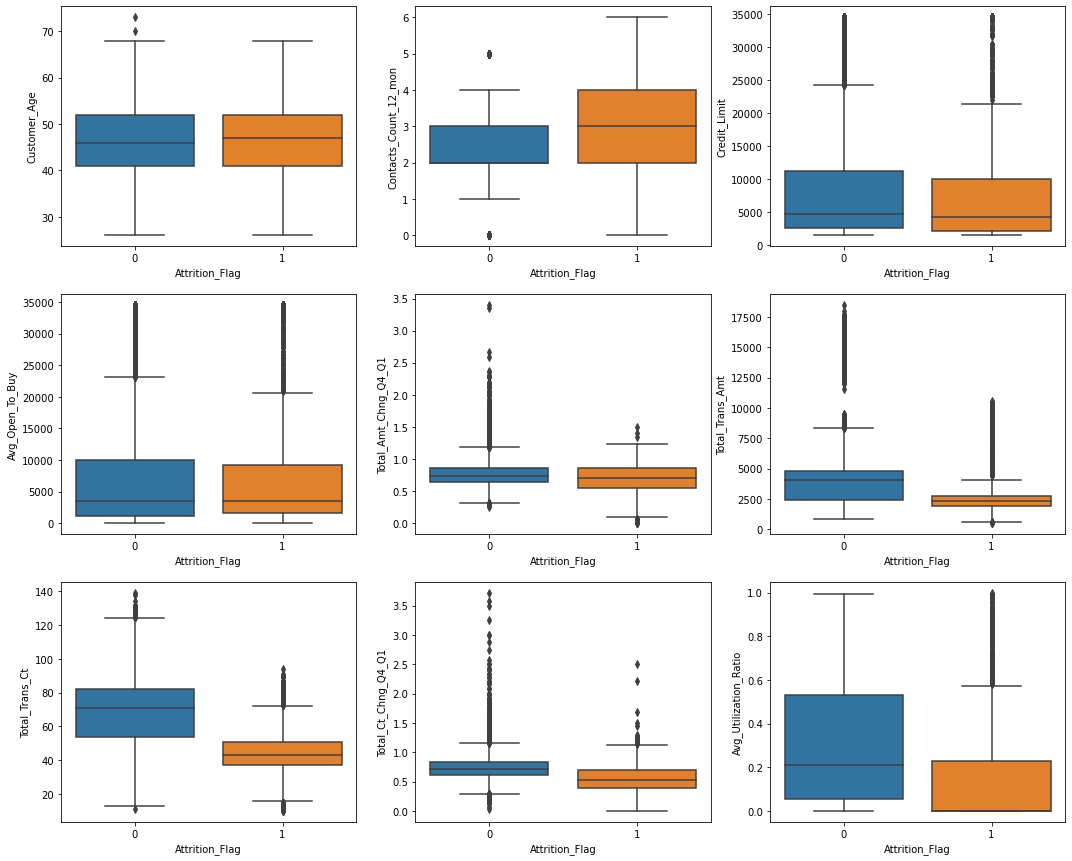

In [293]:
['Customer_Age', 'Contacts_Count_12_mon', 'Credit_Limit', 
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
f, ax = plt.subplots(3, 3, figsize = (18, 15))
sns.boxplot(x='Attrition_Flag',y='Customer_Age', data=df, ax=ax[0, 0])
sns.boxplot(x='Attrition_Flag',y='Contacts_Count_12_mon', data=df, ax=ax[0, 1])
sns.boxplot(x='Attrition_Flag',y='Credit_Limit', data=df, ax=ax[0, 2])
sns.boxplot(x='Attrition_Flag',y='Avg_Open_To_Buy', data=df, ax=ax[1, 0])
sns.boxplot(x='Attrition_Flag',y='Total_Amt_Chng_Q4_Q1', data=df, ax=ax[1, 1])
sns.boxplot(x='Attrition_Flag',y='Total_Trans_Amt', data=df, ax=ax[1, 2])
sns.boxplot(x='Attrition_Flag',y='Total_Trans_Ct', data=df, ax=ax[2, 0])
sns.boxplot(x='Attrition_Flag',y='Total_Ct_Chng_Q4_Q1', data=df, ax=ax[2, 1])
sns.boxplot(x='Attrition_Flag',y='Avg_Utilization_Ratio', data=df, ax=ax[2, 2])
plt.show()

In [243]:
def detect_outliers(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std = np.std(data)
    
    for y in data:
        z_score = (y - mean) / std
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\n Outliers caps for {}: '.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                          len([i for i in data if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3 * std, len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99), 
                                                          len([i for i in data if i > data.quantile(.99)])))

In [244]:
for feat in ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt']:
    detect_outliers(feat)


 Outliers caps for Credit_Limit: 
  --95p: 34516.0 / 0 values exceed that
  --3sd: 35896.9 / 0 values exceed that
  --99p: 34516.0 / 0 values exceed that

 Outliers caps for Avg_Open_To_Buy: 
  --95p: 32183.4 / 507 values exceed that
  --3sd: 34739.8 / 0 values exceed that
  --99p: 34294.1 / 102 values exceed that

 Outliers caps for Total_Trans_Amt: 
  --95p: 14212.0 / 506 values exceed that
  --3sd: 14595.0 / 391 values exceed that
  --99p: 15882.4 / 102 values exceed that


In [246]:
for feat in cont_feat:
    df[feat].clip(upper = df[feat].quantile(.99), inplace = True)

In [247]:
df['Total_Trans_Amt'].max()

15882.359999999997

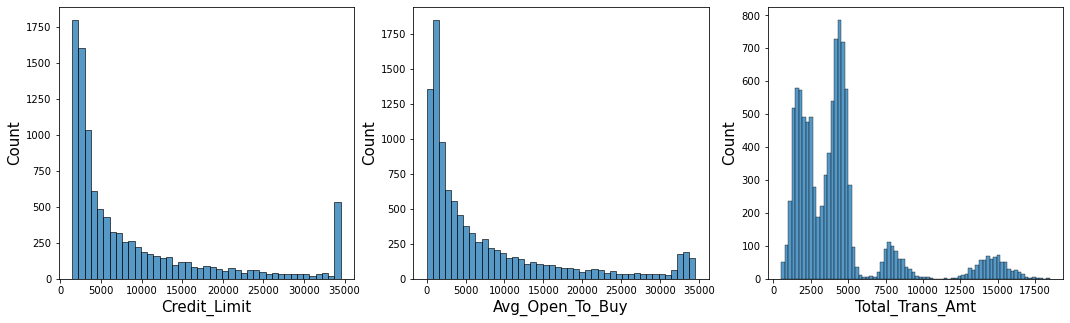

In [296]:
fig, ax = plt.subplots(1, 3, figsize = (18, 5))
i = 0
for col in ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt']:
    fig = sns.histplot((df[col]), ax = ax[i])
    fig.set_xlabel(f'{col}', fontsize=15)
    fig.set_ylabel('Count',fontsize=15)
    i+=1

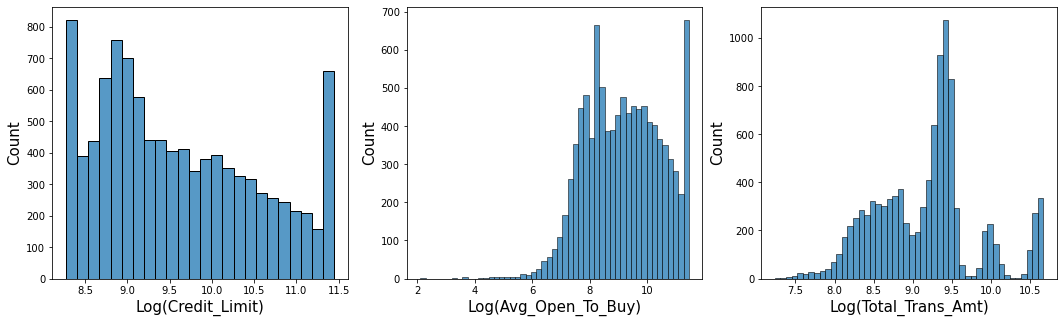

In [271]:
fig, ax = plt.subplots(1, 3, figsize = (18, 5))
i = 0
for col in ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt']:
    fig = sns.histplot(np.log(df[col])+1, ax = ax[i])
    fig.set_xlabel(f'Log({col})', fontsize=15)
    fig.set_ylabel('Count',fontsize=15)
    i+=1

## Categorical Variables

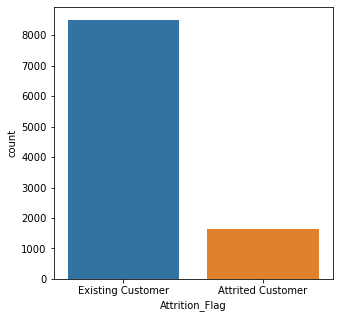

In [96]:
plt.figure(figsize = (5,5))
sns.countplot(x="Attrition_Flag", data=tmp)
plt.show()

In [22]:
cat_feat = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

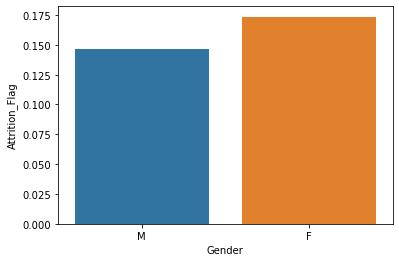

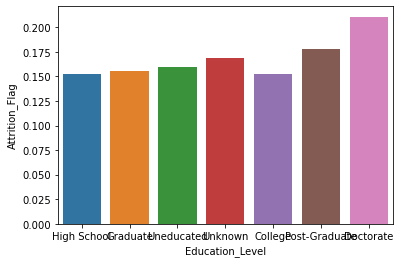

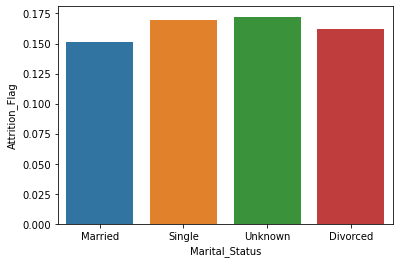

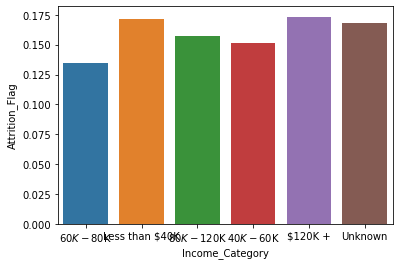

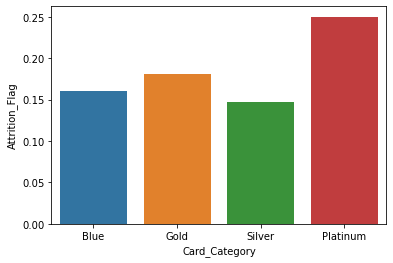

In [23]:
for cols in cat_feat: 
    sns.barplot(x=df[cols], y=df['Attrition_Flag'], fill=True, alpha=1, ci=None)
    plt.show()

In [24]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Transformation

In [25]:
for col in cat_feat:
    dummy_cols = pd.get_dummies(df[col], drop_first=True, prefix=col)
    df = pd.concat([df,dummy_cols],axis=1)
    df.drop(columns=col, inplace=True)

In [26]:
df['Log_Credit_Limit'] = np.log(df['Credit_Limit'] + 1)
df['Log_Avg_Open_To_Buy'] = np.log(df['Avg_Open_To_Buy'] + 1)
df['Log_Total_Trans_Amt'] = np.log(df['Total_Trans_Amt'] + 1)

In [27]:
df_final = df.drop(['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt'], axis=1)

In [28]:
df_final.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Log_Credit_Limit,Log_Avg_Open_To_Buy,Log_Total_Trans_Amt
0,0,45,3,39,5,1,3,777,1.335,42,1.625,0.061,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,9.448727,9.385553,7.043160
1,0,49,5,44,6,1,2,864,1.541,33,3.714,0.105,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,9.018817,8.908289,7.163947
2,0,51,3,36,4,1,0,0,2.594,20,2.333,0.000,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,8.137103,8.137103,7.543273
3,0,40,4,34,3,4,1,2517,1.405,20,2.333,0.760,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,8.105911,6.680855,7.066467
4,0,40,3,21,5,1,0,0,2.175,28,2.500,0.000,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,8.458928,8.458928,6.705639


## Train Val Test Split

In [29]:
y = df_final['Attrition_Flag'].copy()
X = df_final.drop(['Attrition_Flag'], axis=1)

In [30]:
#split dataset in training, validation and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state =42)

In [31]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Log_Credit_Limit,Log_Avg_Open_To_Buy,Log_Total_Trans_Amt
8205,42,3,27,1,1,1,1889,0.661,71,0.614,0.261,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,8.885579,8.582606,8.445482
4421,37,0,28,4,3,1,0,0.688,81,0.841,0.000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7.560601,7.560601,8.458716
8112,36,3,27,1,2,3,1953,0.599,89,0.935,0.839,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,7.753194,5.929589,8.383433
10102,33,1,36,5,3,3,1875,0.727,123,0.757,0.223,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,9.035868,8.783243,9.723583
7472,53,2,49,4,2,3,0,0.697,77,0.674,0.000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,8.711937,8.711937,8.367300


In [32]:
X_train.shape, y_train.shape

((6076, 32), (6076,))

In [33]:
y_train.value_counts()

0    5110
1     966
Name: Attrition_Flag, dtype: int64

In [34]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(y), 2))

0.6
0.2
0.2


### Scaling

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [38]:
X_train[:2]

array([[0.38095238, 0.6       , 0.3255814 , 0.        , 0.16666667,
        0.16666667, 0.75049662, 0.25481881, 0.46875   , 0.16532041,
        0.26126126, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.50787449,
        0.79403963, 0.6156355 ],
       [0.26190476, 0.        , 0.34883721, 0.6       , 0.5       ,
        0.16666667, 0.        , 0.26522745, 0.546875  , 0.2264405 ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.09085999,
        0.68127178, 0.61932353]])

## Smote

In [39]:
sm = SMOTE(random_state = 100)

In [40]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [41]:
df.shape

(10127, 36)

In [42]:
pd.DataFrame(X_train).shape

(10220, 32)

## Training

In [43]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    auc_roc = round(roc_auc_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAUC_ROC: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     auc_roc,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))
    return auc_roc, precision, recall
    

### Logistic Regression

In [44]:
scores = []

In [45]:
params = {
    'C': [100, 10, 1.0, 0.1, 0.01]
}

In [46]:
LR = LogisticRegression(max_iter=10000)
grid_LR = GridSearchCV(estimator=LR, param_grid=params, n_jobs=-1, cv=10, scoring='f1')
grid_LR.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01]}, scoring='f1')

In [47]:
train_auc_roc, train_precision, train_recall = evaluate_model('LR', grid_LR, X_train, y_train)

LR -- 	AUC_ROC: 0.891 / Precision: 0.887 / Recall: 0.897 / Latency: 0.0ms


In [48]:
val_auc_roc, val_precision, val_recall = evaluate_model('LR', grid_LR, X_val, y_val)

LR -- 	AUC_ROC: 0.841 / Precision: 0.554 / Recall: 0.808 / Latency: 0.0ms


In [49]:
test_auc_roc, test_precision, test_recall = evaluate_model('LR', grid_LR, X_test, y_test)

LR -- 	AUC_ROC: 0.859 / Precision: 0.591 / Recall: 0.832 / Latency: 0.0ms


In [50]:
model_name = 'Logistic Regression'

scores.append({
    'Model': model_name,
    'Train AUC ROC': train_auc_roc,
    'Val AUC ROC': val_auc_roc,
    'Test AUC ROC Score': test_auc_roc,
    'Test Precision': test_precision,
    'Test Recall': test_recall
})

### SVM

In [51]:
from sklearn import svm

In [52]:
#Create a svm Classifier
svm = svm.SVC(gamma = 'auto', probability=True)

#Train the model using the training sets
svm.fit(X_train, y_train)

SVC(gamma='auto', probability=True)

In [53]:
evaluate_model('SVM', svm, X_test, y_test)

SVM -- 	AUC_ROC: 0.847 / Precision: 0.562 / Recall: 0.82 / Latency: 1105.1ms


(0.847, 0.562, 0.82)

In [54]:
train_auc_roc, train_precision, train_recall = evaluate_model('svm', svm, X_train, y_train)

svm -- 	AUC_ROC: 0.881 / Precision: 0.877 / Recall: 0.887 / Latency: 5899.1ms


In [55]:
val_auc_roc, val_precision, val_recall = evaluate_model('svm', svm, X_val, y_val)

svm -- 	AUC_ROC: 0.834 / Precision: 0.525 / Recall: 0.811 / Latency: 1297.4ms


In [56]:
test_auc_roc, test_precision, test_recall = evaluate_model('svm', svm, X_test, y_test)

svm -- 	AUC_ROC: 0.847 / Precision: 0.562 / Recall: 0.82 / Latency: 1179.1ms


In [57]:
model_name = 'SVM'

scores.append({
    'Model': model_name,
    'Train AUC ROC': train_auc_roc,
    'Val AUC ROC': val_auc_roc,
    'Test AUC ROC Score': test_auc_roc,
    'Test Precision': test_precision,
    'Test Recall': test_recall
})

### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [60]:
# DT = DecisionTreeClassifier()

# # Train Decision Tree Classifer
# DT = clf.fit(X_train,y_train)

In [61]:
DT = DecisionTreeClassifier()
grid_DT = GridSearchCV(estimator=DT, param_grid=params, n_jobs=-1, cv=10, scoring='roc_auc')
grid_DT.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc')

In [62]:
train_auc_roc, train_precision, train_recall = evaluate_model('DT', grid_DT, X_train, y_train)

DT -- 	AUC_ROC: 0.952 / Precision: 0.959 / Recall: 0.944 / Latency: 4.0ms


In [63]:
val_auc_roc, val_precision, val_recall = evaluate_model('DT', grid_DT, X_val, y_val)

DT -- 	AUC_ROC: 0.867 / Precision: 0.696 / Recall: 0.802 / Latency: 4.0ms


In [64]:
test_auc_roc, test_precision, test_recall = evaluate_model('DT', grid_DT, X_test, y_test)

DT -- 	AUC_ROC: 0.894 / Precision: 0.766 / Recall: 0.838 / Latency: 4.0ms


In [65]:
model_name = 'DT'

scores.append({
    'Model': model_name,
    'Train AUC ROC': train_auc_roc,
    'Val AUC ROC': val_auc_roc,
    'Test AUC ROC Score': test_auc_roc,
    'Test Precision': test_precision,
    'Test Recall': test_recall
})

### Random Forest

In [66]:
# xgb_model = XGBClassifier(random_state=100, use_label_encoder=False, n_jobs=-1)

# xgb_model.fit(X_train, y_train)

In [67]:
params = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, 64, None],
}

In [68]:
RF = RandomForestClassifier()
grid_RF = GridSearchCV(RF, params, cv = 10, scoring = 'roc_auc', n_jobs = -1)
grid_RF.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 16, 32, 64, None],
                         'n_estimators': [8, 16, 32, 64, 128, 256, 512]},
             scoring='roc_auc')

In [69]:
train_auc_roc, train_precision, train_recall = evaluate_model('RF', grid_RF, X_train, y_train)

RF -- 	AUC_ROC: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 633.6ms


In [70]:
val_auc_roc, val_precision, val_recall = evaluate_model('RF', grid_RF, X_val, y_val)

RF -- 	AUC_ROC: 0.89 / Precision: 0.822 / Recall: 0.814 / Latency: 166.9ms


In [71]:
test_auc_roc, test_precision, test_recall = evaluate_model('RF', grid_RF, X_test, y_test)

RF -- 	AUC_ROC: 0.926 / Precision: 0.915 / Recall: 0.868 / Latency: 184.4ms


In [72]:
model_name = 'RF'

scores.append({
    'Model': model_name,
    'Train AUC ROC': train_auc_roc,
    'Val AUC ROC': val_auc_roc,
    'Test AUC ROC Score': test_auc_roc,
    'Test Precision': test_precision,
    'Test Recall': test_recall
})

## XgBoost

In [73]:
params = {
    'n_estimators': [2**i for i in range(3, 10)],
    'learning_rate': np.arange(0.01, 0.1, 0.01),
    'max_depth': np.arange(1, 10, 1),
    'subsample': np.arange(0, 1.1, 0.1),
    'min_child_weight': [1, 2, 3, 4, 5, 10, 50, 100],
    'reg_alpha': [1, 2, 3, 4, 5, 10, 50, 100],
    'reg_lambda':  [1, 2, 3, 4, 5, 10, 50, 100],
    'colsample_bytree':  np.arange(0, 1.1, 0.1),
    'colsample_bylevel':  np.arange(0, 1.1, 0.1),
}

In [74]:
xgb = XGBClassifier(objective = 'binary:logistic')

In [75]:
random_xgb = RandomizedSearchCV(xgb, params, cv = 5, scoring = 'roc_auc',
                                 n_iter = 500, random_state = 10, return_train_score = False, n_jobs = -1)
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                        'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                  

In [76]:
train_auc_roc, train_precision, train_recall = evaluate_model('XGB', random_xgb, X_train, y_train)

XGB -- 	AUC_ROC: 0.991 / Precision: 0.992 / Recall: 0.989 / Latency: 21.3ms


In [77]:
val_auc_roc, val_precision, val_recall = evaluate_model('XGB', random_xgb, X_val, y_val)

XGB -- 	AUC_ROC: 0.936 / Precision: 0.872 / Recall: 0.896 / Latency: 8.0ms


In [78]:
test_auc_roc, test_precision, test_recall = evaluate_model('XGB', random_xgb, X_test, y_test)

XGB -- 	AUC_ROC: 0.942 / Precision: 0.917 / Recall: 0.901 / Latency: 8.0ms


In [79]:
pd.DataFrame(scores)

model_name = 'XGB'

scores.append({
    'Model': model_name,
    'Train AUC ROC': train_auc_roc,
    'Val AUC ROC': val_auc_roc,
    'Test AUC ROC Score': test_auc_roc,
    'Test Precision': test_precision,
    'Test Recall': test_recall
})

In [80]:
pd.DataFrame(scores)

,Model,Train AUC ROC,Val AUC ROC,Test AUC ROC Score,Test Precision,Test Recall
0,Logistic Regression,0.891,0.841,0.859,0.591,0.832
1,SVM,0.881,0.834,0.847,0.562,0.820
2,DT,0.952,0.867,0.894,0.766,0.838
3,RF,1.000,0.890,0.926,0.915,0.868
4,XGB,0.991,0.936,0.942,0.917,0.901


In [81]:
def cal_f1_score(precision, recall):
    return round(2 * (precision * recall)/(precision + recall), 3)

In [82]:
def cal_f1_score(precision, recall):
    return round(2 * (precision * recall)/(precision + recall), 3)

results = pd.DataFrame(scores)
results['Test F1 Score'] = cal_f1_score(results['Test Precision'], results['Test Recall'])

In [83]:
#one-hot-encoding

In [84]:
results

,Model,Train AUC ROC,Val AUC ROC,Test AUC ROC Score,Test Precision,Test Recall,Test F1 Score
0,Logistic Regression,0.891,0.841,0.859,0.591,0.832,0.691
1,SVM,0.881,0.834,0.847,0.562,0.820,0.667
2,DT,0.952,0.867,0.894,0.766,0.838,0.800
3,RF,1.000,0.890,0.926,0.915,0.868,0.891
4,XGB,0.991,0.936,0.942,0.917,0.901,0.909
